# K-means clustering

In [1]:
#22/1/2020
#concept of centroid
#elbow method to calculate k value (no.of clusters)
#k=sqr.root of (n/2)


[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37265.86520484347, 30259.65720728547, 25095.703209997548, 21830.041978049434, 20736.679938924124]


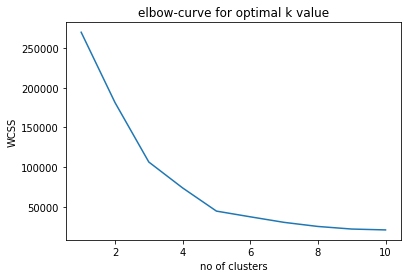

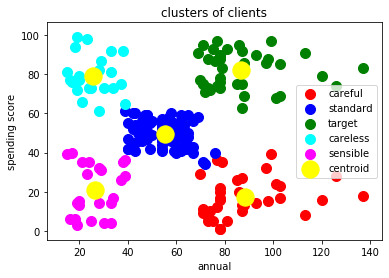

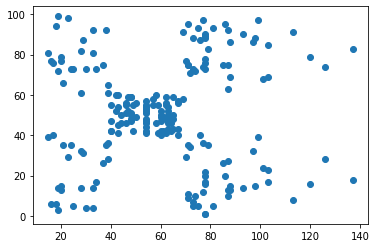

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

dataset=pd.read_csv('Mall_Customers.csv')
#dataset.info()

#x=dataset['Annual Income (k$)','Spending Score (1-100)']
x=dataset.iloc[:,[3,4]].values
#print(x)
WCSS=[] #within cluster sum of squares
#give i from 1,10 and find k value using graph
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)
print(WCSS)
plt.plot(range(1,11),WCSS)
plt.title("elbow-curve for optimal k value")
plt.xlabel("no of clusters")
plt.ylabel("WCSS")
plt.show()

#now we got the k value as 5, ie i=5 give it into the model
model=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=model.fit_predict(x)
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=100,c='red',label='careful')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=100,c='blue',label='standard')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=100,c='green',label='target')
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=100,c='cyan',label='careless')
plt.scatter(x[y_means==4,0],x[y_means==4,1],s=100,c='magenta',label='sensible')

plt.title("clusters of clients")
plt.xlabel("annual")
plt.ylabel("spending score")


plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=300,c='yellow',label='centroid')
plt.legend()
plt.show()
plt.scatter(dataset['Annual Income (k$)'],dataset['Spending Score (1-100)'])

